<a href="https://colab.research.google.com/github/AmiraliLalehpour/MMAI-823-Final-Project/blob/main/Sentiment_Analysis_%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
!pip install yfinance pandas matoplotlib

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

ERROR: Could not find a version that satisfies the requirement matoplotlib (from versions: none)
ERROR: No matching distribution found for matoplotlib


In [85]:


# Define the stock symbols
symbols = ["GME", "AMC"]

# Define the date range
start_date = "2020-09-29"
end_date = "2021-09-29"

# Fetch historical data for all symbols
data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%***********************]  2 of 2 completed


Actual Results For This Time Period

In [86]:
actual_returns = data["Close"].iloc[-1]/data["Close"].iloc[0] - 1

print("Actual Returns:")

for symbol, return_value in actual_returns.items():

  print(f"{symbol}: {return_value:.2%}")


Actual Returns:
AMC: 661.11%
GME: 1625.60%


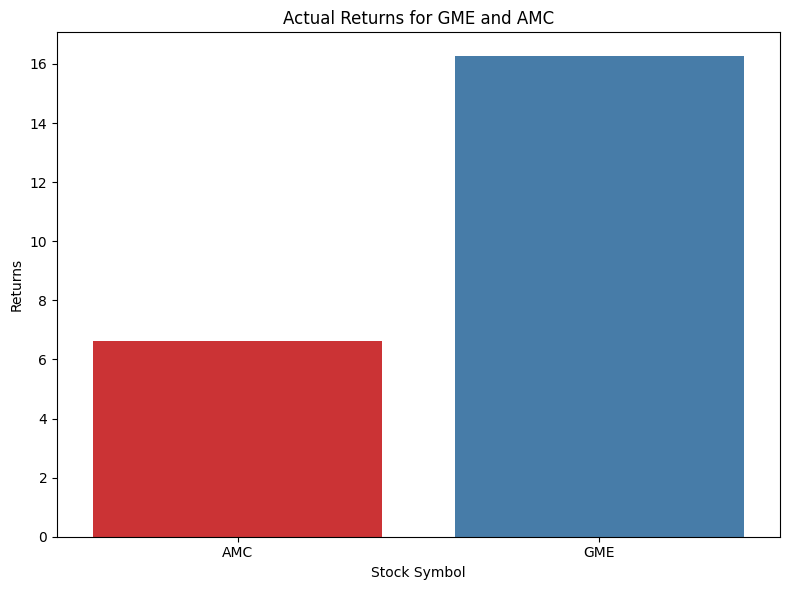

In [87]:

# Create a bar plot for actual returns
plt.figure(figsize=(8, 6))
sns.barplot(x=actual_returns.index, y=actual_returns.values, palette='Set1')
plt.title('Actual Returns for GME and AMC')
plt.ylabel('Returns')
plt.xlabel('Stock Symbol')
plt.xticks(ticks=np.arange(len(actual_returns)), labels=actual_returns.index)
plt.tight_layout()
plt.show()

In [88]:

#These are the actual results for GMC and AMC for the year starting in 2020 till 2021.

#Our goal is to comparing the real results with different strategies and to see if we can beat it.

In [89]:

data.head()

Adj Close         Close          High           Low          Open  \
                 AMC     GME   AMC     GME   AMC     GME   AMC     GME   AMC   
Date                                                                           
2020-09-29      4.86  2.5875  4.86  2.5875  4.94  2.6625  4.75  2.4825  4.88   
2020-09-30      4.71  2.5500  4.71  2.5500  4.95  2.6900  4.70  2.5150  4.80   
2020-10-01      4.65  2.4425  4.65  2.4425  4.80  2.5625  4.63  2.4225  4.78   
2020-10-02      4.65  2.3475  4.65  2.3475  4.66  2.4450  4.42  2.3250  4.48   
2020-10-05      4.13  2.3650  4.13  2.3650  4.36  2.3975  4.05  2.3125  4.30   

                     Volume            
               GME      AMC       GME  
Date                                   
2020-09-29  2.5000  2520000  20950400  
2020-09-30  2.5625  2515400  24316000  
2020-10-01  2.5225  3223800  18216400  
2020-10-02  2.3450  3576000  17362000  
2020-10-05  2.3600  9468800  11220000

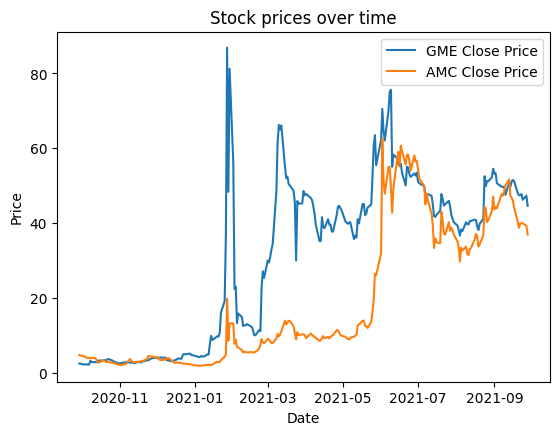

In [90]:

#Visualizing

plt.figure(figsize = (14,10))

#Line plots of stock prices over time. Note: this is actual price over that time period, which has been downloaded from Yahoo Finance

plt.subplot(2,2,1)
for symbol in symbols:
  plt.plot(data['Close'][symbol], label=f'{symbol} Close Price')

plt.title("Stock prices over time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-09-29 to 2021-09-28
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, AMC)  252 non-null    float64
 1   (Adj Close, GME)  252 non-null    float64
 2   (Close, AMC)      252 non-null    float64
 3   (Close, GME)      252 non-null    float64
 4   (High, AMC)       252 non-null    float64
 5   (High, GME)       252 non-null    float64
 6   (Low, AMC)        252 non-null    float64
 7   (Low, GME)        252 non-null    float64
 8   (Open, AMC)       252 non-null    float64
 9   (Open, GME)       252 non-null    float64
 10  (Volume, AMC)     252 non-null    int64  
 11  (Volume, GME)     252 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 25.6 KB


Price Momentum Strategy

In [92]:

momentum_period = 90
buy_threshold = 0.05
sell_threshold = -0.05

In [93]:
# Calculate price momentum
for symbol in symbols:
    data['Momentum', symbol] = data['Close', symbol].pct_change(momentum_period)


In [94]:
# Generate signals
for symbol in symbols:
    data['Signal', symbol] = 0
    data.loc[data['Momentum', symbol] > buy_threshold, ('Signal', symbol)] = 1
    data.loc[data['Momentum', symbol] < sell_threshold, ('Signal', symbol)] = -1



Loading in output from Sentiment Analysis

In [95]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
csv_file_path = "/content/drive/MyDrive/Finance Project/output.csv"

import pandas as pd


csv_data = pd.read_csv(csv_file_path)

In [97]:
sentiment_data = csv_data
sentiment_data.head()

,score,id,comms_num,timestamp,text,original_text,Weekday,negative_score,positive_score,neutral_score,compound_score,overall_sentiment,text_sentiment_polarity,text_sentiment_subjectivity
0,55,l6ulcx,6,2021-01-28 21:37:41,money sending message 🚀 💎 🙌,"It's not about the money, it's about sending a...",Thursday,0.000,0.000,1.000,0.0000,Neutral,0.000000,0.000000
1,110,l6uibd,23,2021-01-28 21:32:10,math professor scott steiner says numbers spel...,Math Professor Scott Steiner says the numbers ...,Thursday,0.313,0.000,0.687,-0.6249,Negative,0.000000,0.000000
2,0,l6uhhn,47,2021-01-28 21:30:35,exit system ceo nasdaq pushed halt trading inv...,Exit the system The CEO of NASDAQ pushed to ha...,Thursday,0.112,0.125,0.763,0.3400,Positive,-0.000923,0.389370
3,29,l6ugk6,74,2021-01-28 21:28:57,new sec filing gme retarded interpret,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,Thursday,0.425,0.000,0.575,-0.5719,Negative,-0.254545,0.618182
4,71,l6ufgy,156,2021-01-28 21:26:56,distract gme thought amc brothers aware,"Not to distract from GME, just thought our AMC...",Thursday,0.306,0.000,0.694,-0.2960,Negative,0.250000,0.250000


In [98]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53186 entries, 0 to 53185
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   score                        53186 non-null  int64  
 1   id                           53186 non-null  object 
 2   comms_num                    53186 non-null  int64  
 3   timestamp                    53186 non-null  object 
 4   text                         53048 non-null  object 
 5   original_text                53186 non-null  object 
 6   Weekday                      53186 non-null  object 
 7   negative_score               53186 non-null  float64
 8   positive_score               53186 non-null  float64
 9   neutral_score                53186 non-null  float64
 10  compound_score               53186 non-null  float64
 11  overall_sentiment            53186 non-null  object 
 12  text_sentiment_polarity      53186 non-null  float64
 13  text_sentiment_s

In [101]:
#ChatGPT code

sentiment_data["timestamp"] = pd.to_datetime(sentiment_data["timestamp"])



In [102]:
#Updating the sentiment analysis data

sentiment_data = sentiment_data[["overall_sentiment", "compound_score","timestamp"]]
sentiment_data["timestamp"] = pd.to_datetime(sentiment_data["timestamp"])


<ipython-input-102-5b837c4feb6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data["timestamp"] = pd.to_datetime(sentiment_data["timestamp"])


In [103]:
sentiment_data.head()

,overall_sentiment,compound_score,timestamp
0,Neutral,0.0000,2021-01-28 21:37:41
1,Negative,-0.6249,2021-01-28 21:32:10
2,Positive,0.3400,2021-01-28 21:30:35
3,Negative,-0.5719,2021-01-28 21:28:57
4,Negative,-0.2960,2021-01-28 21:26:56


In [104]:
# Convert 'timestamp' column to datetime format in sentiment_data DataFrame
sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])

# Extract only the date (YYYY-MM-DD) part from timestamp
sentiment_data['date'] = sentiment_data['timestamp'].dt.date


<ipython-input-104-c464b0b7340e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
<ipython-input-104-c464b0b7340e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['date'] = sentiment_data['timestamp'].dt.date


In [105]:
sentiment_data.head()

,overall_sentiment,compound_score,timestamp,date
0,Neutral,0.0000,2021-01-28 21:37:41,2021-01-28
1,Negative,-0.6249,2021-01-28 21:32:10,2021-01-28
2,Positive,0.3400,2021-01-28 21:30:35,2021-01-28
3,Negative,-0.5719,2021-01-28 21:28:57,2021-01-28
4,Negative,-0.2960,2021-01-28 21:26:56,2021-01-28


In [106]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53186 entries, 0 to 53185
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   overall_sentiment  53186 non-null  object        
 1   compound_score     53186 non-null  float64       
 2   timestamp          53186 non-null  datetime64[ns]
 3   date               53186 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.6+ MB


In [107]:
# Delete the 'timestamp' column
sentiment_data.drop('timestamp', axis=1, inplace=True)

<ipython-input-107-0f0ce770694b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data.drop('timestamp', axis=1, inplace=True)


In [108]:
sentiment_data.head()

,overall_sentiment,compound_score,date
0,Neutral,0.0000,2021-01-28
1,Negative,-0.6249,2021-01-28
2,Positive,0.3400,2021-01-28
3,Negative,-0.5719,2021-01-28
4,Negative,-0.2960,2021-01-28


In [109]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53186 entries, 0 to 53185
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   overall_sentiment  53186 non-null  object 
 1   compound_score     53186 non-null  float64
 2   date               53186 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [110]:
# Convert 'date' column to datetime type
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])

# Group by 'date' and calculate the mean of 'compound_score'
sentiment_data = sentiment_data.groupby('date')['compound_score'].mean().reset_index()




<ipython-input-110-d9fcf921a5ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])


In [111]:
sentiment_data.head()

,date,compound_score
0,2021-01-28,0.029089
1,2021-01-29,-0.018890
2,2021-01-30,0.137982
3,2021-01-31,0.145259
4,2021-02-01,0.143150


In [112]:
sentiment_data.info()
sentiment_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            176 non-null    datetime64[ns]
 1   compound_score  176 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


(176, 2)

In [113]:
data.head()

Adj Close         Close          High           Low          Open  \
                 AMC     GME   AMC     GME   AMC     GME   AMC     GME   AMC   
Date                                                                           
2020-09-29      4.86  2.5875  4.86  2.5875  4.94  2.6625  4.75  2.4825  4.88   
2020-09-30      4.71  2.5500  4.71  2.5500  4.95  2.6900  4.70  2.5150  4.80   
2020-10-01      4.65  2.4425  4.65  2.4425  4.80  2.5625  4.63  2.4225  4.78   
2020-10-02      4.65  2.3475  4.65  2.3475  4.66  2.4450  4.42  2.3250  4.48   
2020-10-05      4.13  2.3650  4.13  2.3650  4.36  2.3975  4.05  2.3125  4.30   

                     Volume           Momentum     Signal      
               GME      AMC       GME      GME AMC    GME AMC  
Date                                                           
2020-09-29  2.5000  2520000  20950400      NaN NaN      0   0  
2020-09-30  2.5625  2515400  24316000      NaN NaN      0   0  
2020-10-01  2.5225  3223800  18216400      NaN NaN      0   0  
2020-10-02  2.3450  3576000  17362000      NaN NaN      0   0  
2020-10-05  2.3600  9468800  11220000      NaN NaN      0   0

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-09-29 to 2021-09-28
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, AMC)  252 non-null    float64
 1   (Adj Close, GME)  252 non-null    float64
 2   (Close, AMC)      252 non-null    float64
 3   (Close, GME)      252 non-null    float64
 4   (High, AMC)       252 non-null    float64
 5   (High, GME)       252 non-null    float64
 6   (Low, AMC)        252 non-null    float64
 7   (Low, GME)        252 non-null    float64
 8   (Open, AMC)       252 non-null    float64
 9   (Open, GME)       252 non-null    float64
 10  (Volume, AMC)     252 non-null    int64  
 11  (Volume, GME)     252 non-null    int64  
 12  (Momentum, GME)   162 non-null    float64
 13  (Momentum, AMC)   162 non-null    float64
 14  (Signal, GME)     252 non-null    int64  
 15  (Signal, AMC)     252 non-null    int64  
dtypes: float64(12), int64(4)


In [118]:
# Merge the two DataFrames based on the 'date' column
merged_data = data.merge(sentiment_data, left_index=True, right_on='date', how='inner')


<ipython-input-118-95dacb8fc928>:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged_data = data.merge(sentiment_data, left_index=True, right_on='date', how='inner')


In [119]:
merged_data.head()

,"(Adj Close, AMC)","(Adj Close, GME)","(Close, AMC)","(Close, GME)","(High, AMC)","(High, GME)","(Low, AMC)","(Low, GME)","(Open, AMC)","(Open, GME)","(Volume, AMC)","(Volume, GME)","(Momentum, GME)","(Momentum, AMC)","(Signal, GME)","(Signal, AMC)",date,compound_score
0,8.63,48.400002,8.63,48.400002,16.50,120.750000,6.51,28.0625,11.98,66.250000,591223900,235263200,NaN,NaN,0,0,2021-01-28,0.029089
1,13.26,81.250000,13.26,81.250000,16.00,103.495003,11.60,62.5000,14.31,94.927498,602193300,202264400,NaN,NaN,0,0,2021-01-29,-0.018890
4,13.30,56.250000,13.30,56.250000,17.25,80.500000,12.91,53.0000,17.00,79.139999,434608000,149528800,NaN,NaN,0,0,2021-02-01,0.143150
5,7.82,22.500000,7.82,22.500000,10.10,39.500000,6.00,18.5550,9.48,35.189999,462775900,312732400,NaN,NaN,0,0,2021-02-02,0.080940
6,8.97,23.102501,8.97,23.102501,9.77,28.350000,7.89,21.3125,8.85,28.002501,221405100,170794000,NaN,NaN,0,0,2021-02-03,0.081863


In [120]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 175
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   (Adj Close, AMC)  122 non-null    float64       
 1   (Adj Close, GME)  122 non-null    float64       
 2   (Close, AMC)      122 non-null    float64       
 3   (Close, GME)      122 non-null    float64       
 4   (High, AMC)       122 non-null    float64       
 5   (High, GME)       122 non-null    float64       
 6   (Low, AMC)        122 non-null    float64       
 7   (Low, GME)        122 non-null    float64       
 8   (Open, AMC)       122 non-null    float64       
 9   (Open, GME)       122 non-null    float64       
 10  (Volume, AMC)     122 non-null    int64         
 11  (Volume, GME)     122 non-null    int64         
 12  (Momentum, GME)   115 non-null    float64       
 13  (Momentum, AMC)   115 non-null    float64       
 14  (Signal, GME)     122 non-

In [123]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
merged_data

,"(Adj Close, AMC)","(Adj Close, GME)","(Close, AMC)","(Close, GME)","(High, AMC)","(High, GME)","(Low, AMC)","(Low, GME)","(Open, AMC)","(Open, GME)","(Volume, AMC)","(Volume, GME)","(Momentum, GME)","(Momentum, AMC)","(Signal, GME)","(Signal, AMC)",date,compound_score
0,8.630000,48.400002,8.630000,48.400002,16.500000,120.750000,6.510000,28.062500,11.980000,66.250000,591223900,235263200,NaN,NaN,0,0,2021-01-28,0.029089
1,13.260000,81.250000,13.260000,81.250000,16.000000,103.495003,11.600000,62.500000,14.310000,94.927498,602193300,202264400,NaN,NaN,0,0,2021-01-29,-0.018890
4,13.300000,56.250000,13.300000,56.250000,17.250000,80.500000,12.910000,53.000000,17.000000,79.139999,434608000,149528800,NaN,NaN,0,0,2021-02-01,0.143150
5,7.820000,22.500000,7.820000,22.500000,10.100000,39.500000,6.000000,18.555000,9.480000,35.189999,462775900,312732400,NaN,NaN,0,0,2021-02-02,0.080940
6,8.970000,23.102501,8.970000,23.102501,9.770000,28.350000,7.890000,21.312500,8.850000,28.002501,221405100,170794000,NaN,NaN,0,0,2021-02-03,0.081863
7,7.090000,13.375000,7.090000,13.375000,8.740000,22.875000,7.000000,13.332500,8.700000,22.797501,162985800,249709200,NaN,NaN,0,0,2021-02-04,0.124254
8,6.830000,15.942500,6.830000,15.942500,8.270000,23.750000,6.520000,12.772500,7.170000,13.510000,197097600,325380000,NaN,NaN,0,0,2021-02-05,0.087907
11,6.180000,15.000000,6.180000,15.000000,6.890000,18.165001,5.750000,14.505000,6.880000,18.102501,128171500,102749200,4.797101,0.271605,1,1,2021-02-08,0.211134
12,5.500000,12.577500,5.500000,12.577500,5.810000,14.250000,5.260000,11.630000,5.810000,14.152500,102588100,107372400,3.932353,0.167728,1,1,2021-02-09,0.380716
13,5.800000,12.800000,5.800000,12.800000,6.590000,15.707500,5.450000,11.637500,5.710000,12.692500,152810800,145820000,4.240532,0.247312,1,1,2021-02-10,0.329805


In [127]:
# Calculate adjusted price momentum signal using compound score for AMC
merged_data['Adjusted_Price_Momentum_Signal_AMC'] = (merged_data['compound_score'] + 1) * merged_data[('Signal', 'AMC')]

# Calculate adjusted price momentum signal using compound score for GME
merged_data['Adjusted_Price_Momentum_Signal_GME'] = (merged_data['compound_score'] + 1) * merged_data[('Signal', 'GME')]

# Print the entire DataFrame including the adjusted signals
pd.set_option('display.max_rows', None)  # Show all rows
merged_data.head()

,"(Adj Close, AMC)","(Adj Close, GME)","(Close, AMC)","(Close, GME)","(High, AMC)","(High, GME)","(Low, AMC)","(Low, GME)","(Open, AMC)","(Open, GME)","(Volume, AMC)","(Volume, GME)","(Momentum, GME)","(Momentum, AMC)","(Signal, GME)","(Signal, AMC)",date,compound_score,Adjusted_Price_Momentum_Signal_AMC,Adjusted_Price_Momentum_Signal_GME
0,8.63,48.400002,8.63,48.400002,16.50,120.750000,6.51,28.0625,11.98,66.250000,591223900,235263200,NaN,NaN,0,0,2021-01-28,0.029089,0.0,0.0
1,13.26,81.250000,13.26,81.250000,16.00,103.495003,11.60,62.5000,14.31,94.927498,602193300,202264400,NaN,NaN,0,0,2021-01-29,-0.018890,0.0,0.0
4,13.30,56.250000,13.30,56.250000,17.25,80.500000,12.91,53.0000,17.00,79.139999,434608000,149528800,NaN,NaN,0,0,2021-02-01,0.143150,0.0,0.0
5,7.82,22.500000,7.82,22.500000,10.10,39.500000,6.00,18.5550,9.48,35.189999,462775900,312732400,NaN,NaN,0,0,2021-02-02,0.080940,0.0,0.0
6,8.97,23.102501,8.97,23.102501,9.77,28.350000,7.89,21.3125,8.85,28.002501,221405100,170794000,NaN,NaN,0,0,2021-02-03,0.081863,0.0,0.0


In [128]:
merged_data

,"(Adj Close, AMC)","(Adj Close, GME)","(Close, AMC)","(Close, GME)","(High, AMC)","(High, GME)","(Low, AMC)","(Low, GME)","(Open, AMC)","(Open, GME)","(Volume, AMC)","(Volume, GME)","(Momentum, GME)","(Momentum, AMC)","(Signal, GME)","(Signal, AMC)",date,compound_score,Adjusted_Price_Momentum_Signal_AMC,Adjusted_Price_Momentum_Signal_GME
0,8.630000,48.400002,8.630000,48.400002,16.500000,120.750000,6.510000,28.062500,11.980000,66.250000,591223900,235263200,NaN,NaN,0,0,2021-01-28,0.029089,0.000000,0.000000
1,13.260000,81.250000,13.260000,81.250000,16.000000,103.495003,11.600000,62.500000,14.310000,94.927498,602193300,202264400,NaN,NaN,0,0,2021-01-29,-0.018890,0.000000,0.000000
4,13.300000,56.250000,13.300000,56.250000,17.250000,80.500000,12.910000,53.000000,17.000000,79.139999,434608000,149528800,NaN,NaN,0,0,2021-02-01,0.143150,0.000000,0.000000
5,7.820000,22.500000,7.820000,22.500000,10.100000,39.500000,6.000000,18.555000,9.480000,35.189999,462775900,312732400,NaN,NaN,0,0,2021-02-02,0.080940,0.000000,0.000000
6,8.970000,23.102501,8.970000,23.102501,9.770000,28.350000,7.890000,21.312500,8.850000,28.002501,221405100,170794000,NaN,NaN,0,0,2021-02-03,0.081863,0.000000,0.000000
7,7.090000,13.375000,7.090000,13.375000,8.740000,22.875000,7.000000,13.332500,8.700000,22.797501,162985800,249709200,NaN,NaN,0,0,2021-02-04,0.124254,0.000000,0.000000
8,6.830000,15.942500,6.830000,15.942500,8.270000,23.750000,6.520000,12.772500,7.170000,13.510000,197097600,325380000,NaN,NaN,0,0,2021-02-05,0.087907,0.000000,0.000000
11,6.180000,15.000000,6.180000,15.000000,6.890000,18.165001,5.750000,14.505000,6.880000,18.102501,128171500,102749200,4.797101,0.271605,1,1,2021-02-08,0.211134,1.211134,1.211134
12,5.500000,12.577500,5.500000,12.577500,5.810000,14.250000,5.260000,11.630000,5.810000,14.152500,102588100,107372400,3.932353,0.167728,1,1,2021-02-09,0.380716,1.380716,1.380716
13,5.800000,12.800000,5.800000,12.800000,6.590000,15.707500,5.450000,11.637500,5.710000,12.692500,152810800,145820000,4.240532,0.247312,1,1,2021-02-10,0.329805,1.329805,1.329805


Price Momentum Strategy Results for AMC:
Cumulative Strategy Returns: 5.225475699177323

Price Momentum Strategy Results for GME:
Cumulative Strategy Returns: 2.0406952406572856



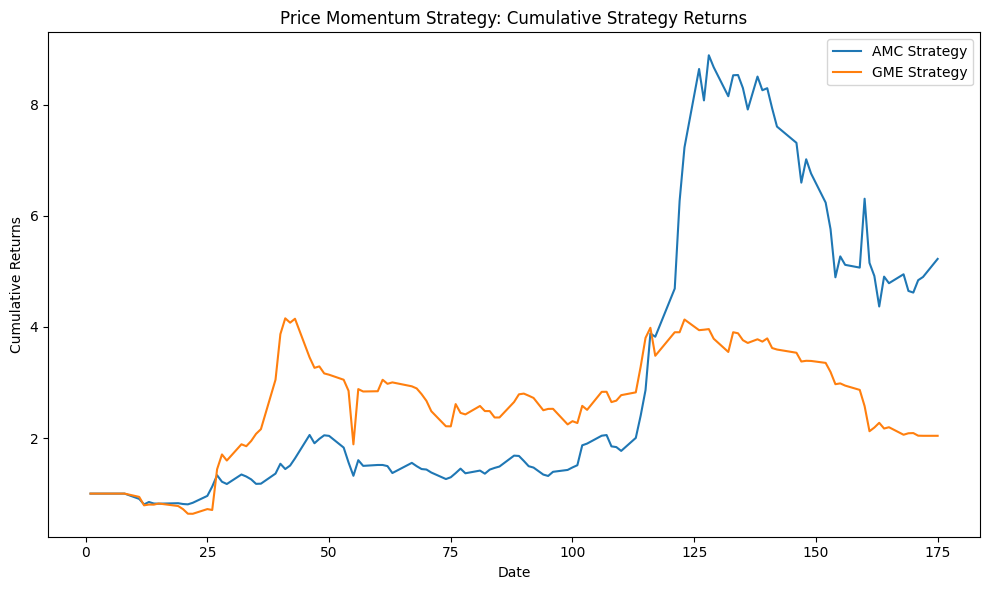

In [129]:
# Define buy and sell thresholds
buy_threshold = 0.1  # Example: Buy when adjusted signal is above 10%
sell_threshold = -0.1  # Example: Sell when adjusted signal is below -10%

# Generate signals for AMC based on adjusted signal
merged_data['Signal_AMC'] = 0
merged_data.loc[merged_data['Adjusted_Price_Momentum_Signal_AMC'] > buy_threshold, 'Signal_AMC'] = 1
merged_data.loc[merged_data['Adjusted_Price_Momentum_Signal_AMC'] < sell_threshold, 'Signal_AMC'] = -1

# Generate signals for GME based on adjusted signal
merged_data['Signal_GME'] = 0
merged_data.loc[merged_data['Adjusted_Price_Momentum_Signal_GME'] > buy_threshold, 'Signal_GME'] = 1
merged_data.loc[merged_data['Adjusted_Price_Momentum_Signal_GME'] < sell_threshold, 'Signal_GME'] = -1

# Calculate cumulative strategy returns for AMC
merged_data['Cumulative_Strategy_Returns_AMC'] = (1 + merged_data['Signal_AMC'] * merged_data[('Close', 'AMC')].pct_change()).cumprod()

# Calculate cumulative strategy returns for GME
merged_data['Cumulative_Strategy_Returns_GME'] = (1 + merged_data['Signal_GME'] * merged_data[('Close', 'GME')].pct_change()).cumprod()

# Print the strategy results
print("Price Momentum Strategy Results for AMC:")
print("Cumulative Strategy Returns:", merged_data['Cumulative_Strategy_Returns_AMC'].iloc[-1])
print()

print("Price Momentum Strategy Results for GME:")
print("Cumulative Strategy Returns:", merged_data['Cumulative_Strategy_Returns_GME'].iloc[-1])
print()

# Visualize the cumulative strategy returns
plt.figure(figsize=(10, 6))
plt.plot(merged_data.index, merged_data['Cumulative_Strategy_Returns_AMC'], label='AMC Strategy')
plt.plot(merged_data.index, merged_data['Cumulative_Strategy_Returns_GME'], label='GME Strategy')
plt.title('Price Momentum Strategy: Cumulative Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.tight_layout()
plt.show()


Actual Returns:
AMC: 3.1355733665620127
GME: -0.15325419675798035

Price Momentum Strategy Results for AMC:
Cumulative Strategy Returns: 5.225475699177323

Price Momentum Strategy Results for GME:
Cumulative Strategy Returns: 2.0406952406572856



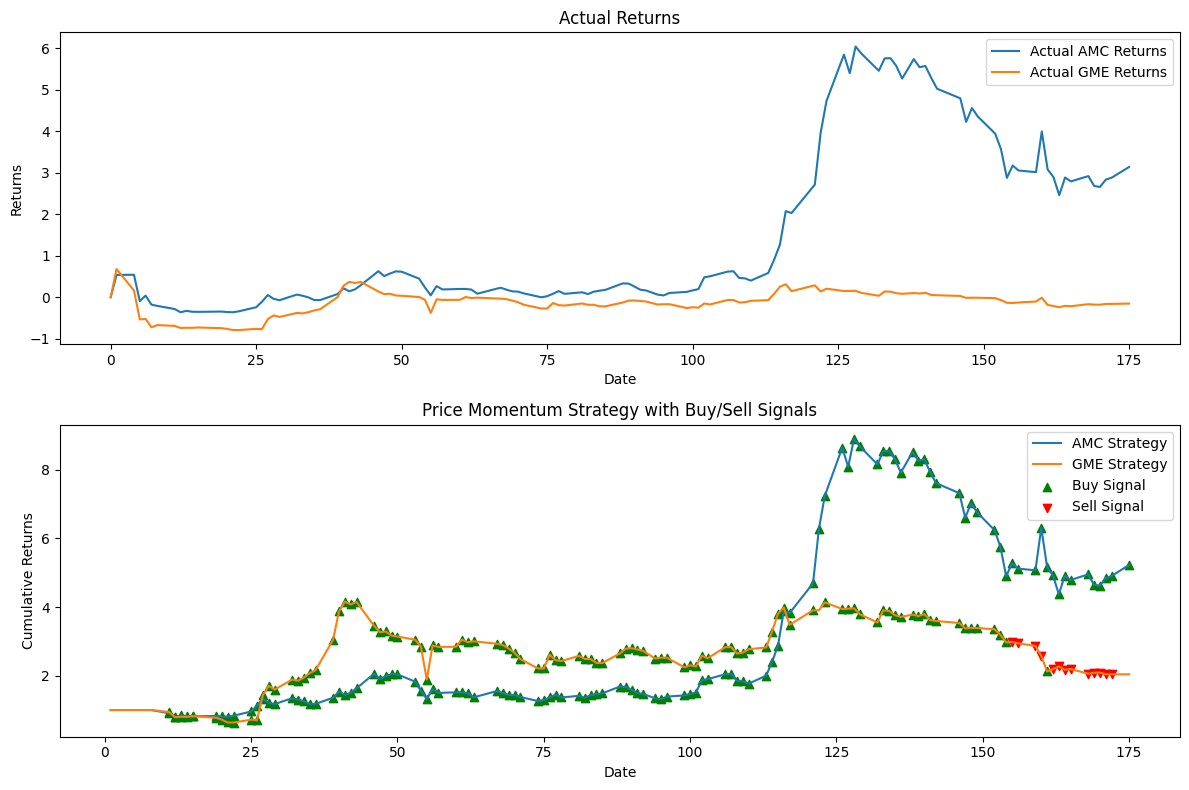

In [130]:
# Calculate actual returns for AMC and GME
actual_returns_amc = merged_data[('Close', 'AMC')].iloc[-1] / merged_data[('Close', 'AMC')].iloc[0] - 1
actual_returns_gme = merged_data[('Close', 'GME')].iloc[-1] / merged_data[('Close', 'GME')].iloc[0] - 1

print("Actual Returns:")
print("AMC:", actual_returns_amc)
print("GME:", actual_returns_gme)
print()

# Define buy and sell thresholds
buy_threshold = 0.1  # Example: Buy when adjusted signal is above 10%
sell_threshold = -0.1  # Example: Sell when adjusted signal is below -10%

# Generate signals for AMC based on adjusted signal
merged_data['Signal_AMC'] = 0
merged_data.loc[merged_data['Adjusted_Price_Momentum_Signal_AMC'] > buy_threshold, 'Signal_AMC'] = 1
merged_data.loc[merged_data['Adjusted_Price_Momentum_Signal_AMC'] < sell_threshold, 'Signal_AMC'] = -1

# Generate signals for GME based on adjusted signal
merged_data['Signal_GME'] = 0
merged_data.loc[merged_data['Adjusted_Price_Momentum_Signal_GME'] > buy_threshold, 'Signal_GME'] = 1
merged_data.loc[merged_data['Adjusted_Price_Momentum_Signal_GME'] < sell_threshold, 'Signal_GME'] = -1

# Calculate cumulative strategy returns for AMC
merged_data['Cumulative_Strategy_Returns_AMC'] = (1 + merged_data['Signal_AMC'] * merged_data[('Close', 'AMC')].pct_change()).cumprod()

# Calculate cumulative strategy returns for GME
merged_data['Cumulative_Strategy_Returns_GME'] = (1 + merged_data['Signal_GME'] * merged_data[('Close', 'GME')].pct_change()).cumprod()

# Print the strategy results
print("Price Momentum Strategy Results for AMC:")
print("Cumulative Strategy Returns:", merged_data['Cumulative_Strategy_Returns_AMC'].iloc[-1])
print()

print("Price Momentum Strategy Results for GME:")
print("Cumulative Strategy Returns:", merged_data['Cumulative_Strategy_Returns_GME'].iloc[-1])
print()

# Visualize the actual returns and cumulative strategy returns with buy and sell signals
plt.figure(figsize=(12, 8))

# Plot actual returns
plt.subplot(2, 1, 1)
plt.plot(merged_data.index, merged_data[('Close', 'AMC')] / merged_data[('Close', 'AMC')].iloc[0] - 1, label='Actual AMC Returns')
plt.plot(merged_data.index, merged_data[('Close', 'GME')] / merged_data[('Close', 'GME')].iloc[0] - 1, label='Actual GME Returns')
plt.title('Actual Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

# Plot cumulative strategy returns with buy/sell signals
plt.subplot(2, 1, 2)
plt.plot(merged_data.index, merged_data['Cumulative_Strategy_Returns_AMC'], label='AMC Strategy')
plt.plot(merged_data.index, merged_data['Cumulative_Strategy_Returns_GME'], label='GME Strategy')
plt.scatter(merged_data.index[merged_data['Signal_AMC'] == 1], merged_data['Cumulative_Strategy_Returns_AMC'][merged_data['Signal_AMC'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(merged_data.index[merged_data['Signal_AMC'] == -1], merged_data['Cumulative_Strategy_Returns_AMC'][merged_data['Signal_AMC'] == -1], marker='v', color='red', label='Sell Signal')
plt.scatter(merged_data.index[merged_data['Signal_GME'] == 1], merged_data['Cumulative_Strategy_Returns_GME'][merged_data['Signal_GME'] == 1], marker='^', color='green')
plt.scatter(merged_data.index[merged_data['Signal_GME'] == -1], merged_data['Cumulative_Strategy_Returns_GME'][merged_data['Signal_GME'] == -1], marker='v', color='red')
plt.title('Price Momentum Strategy with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

plt.tight_layout()
plt.show()


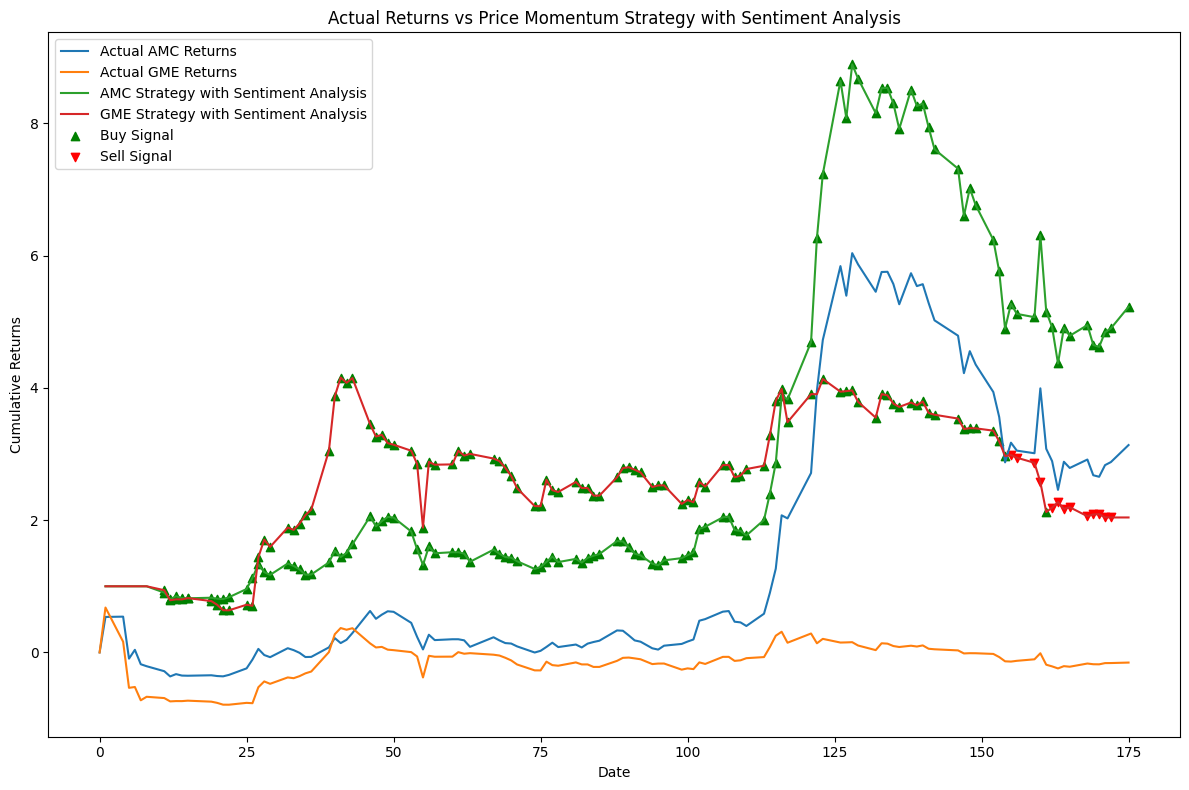

In [131]:
# Visualize the actual returns, price momentum strategy, and sentiment analysis results with buy/sell signals
plt.figure(figsize=(12, 8))

# Plot actual returns
plt.plot(merged_data.index, merged_data[('Close', 'AMC')] / merged_data[('Close', 'AMC')].iloc[0] - 1, label='Actual AMC Returns')
plt.plot(merged_data.index, merged_data[('Close', 'GME')] / merged_data[('Close', 'GME')].iloc[0] - 1, label='Actual GME Returns')

# Plot cumulative strategy returns with sentiment analysis and buy/sell signals
plt.plot(merged_data.index, merged_data['Cumulative_Strategy_Returns_AMC'], label='AMC Strategy with Sentiment Analysis')
plt.plot(merged_data.index, merged_data['Cumulative_Strategy_Returns_GME'], label='GME Strategy with Sentiment Analysis')
plt.scatter(merged_data.index[merged_data['Signal_AMC'] == 1], merged_data['Cumulative_Strategy_Returns_AMC'][merged_data['Signal_AMC'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(merged_data.index[merged_data['Signal_AMC'] == -1], merged_data['Cumulative_Strategy_Returns_AMC'][merged_data['Signal_AMC'] == -1], marker='v', color='red', label='Sell Signal')
plt.scatter(merged_data.index[merged_data['Signal_GME'] == 1], merged_data['Cumulative_Strategy_Returns_GME'][merged_data['Signal_GME'] == 1], marker='^', color='green')
plt.scatter(merged_data.index[merged_data['Signal_GME'] == -1], merged_data['Cumulative_Strategy_Returns_GME'][merged_data['Signal_GME'] == -1], marker='v', color='red')

# Add labels and legend
plt.title('Actual Returns vs Price Momentum Strategy with Sentiment Analysis')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

plt.tight_layout()
plt.show()


In [132]:
# Calculate actual returns in percentage
actual_returns_amc = (merged_data[('Close', 'AMC')].iloc[-1] / merged_data[('Close', 'AMC')].iloc[0] - 1) * 100
actual_returns_gme = (merged_data[('Close', 'GME')].iloc[-1] / merged_data[('Close', 'GME')].iloc[0] - 1) * 100

# Calculate strategy returns in percentage
strategy_returns_amc = (merged_data['Cumulative_Strategy_Returns_AMC'].iloc[-1] - 1) * 100
strategy_returns_gme = (merged_data['Cumulative_Strategy_Returns_GME'].iloc[-1] - 1) * 100

print("Actual Returns:")
print(f"AMC: {actual_returns_amc:.2f}%")
print(f"GME: {actual_returns_gme:.2f}%")

print("Strategy Returns with Sentiment Analysis:")
print(f"AMC: {strategy_returns_amc:.2f}%")
print(f"GME: {strategy_returns_gme:.2f}%")


Actual Returns:
AMC: 313.56%
GME: -15.33%
Strategy Returns with Sentiment Analysis:
AMC: 422.55%
GME: 104.07%


In [133]:
# Visualize cumulative actual returns and strategy returns
plt.figure(figsize=(10, 6))

# Plot cumulative actual returns
plt.plot(merged_data['date'], merged_data['Cumulative_Actual_Returns'], label='Actual', color='black', linestyle='dashed')

# Plot cumulative strategy returns for AMC
plt.plot(merged_data['date'], merged_data['Cumulative_Strategy_Returns_AMC'], label='Strategy with Sentiment (AMC)')

# Plot cumulative strategy returns for GME
plt.plot(merged_data['date'], merged_data['Cumulative_Strategy_Returns_GME'], label='Strategy with Sentiment (GME)')

# Add buy and sell signals
plt.scatter(merged_data[merged_data['Signal_AMC'] == 1]['date'], merged_data[merged_data['Signal_AMC'] == 1]['Cumulative_Strategy_Returns_AMC'], marker='^', color='green', label='Buy Signal (AMC)')
plt.scatter(merged_data[merged_data['Signal_AMC'] == -1]['date'], merged_data[merged_data['Signal_AMC'] == -1]['Cumulative_Strategy_Returns_AMC'], marker='v', color='red', label='Sell Signal (AMC)')

plt.scatter(merged_data[merged_data['Signal_GME'] == 1]['date'], merged_data[merged_data['Signal_GME'] == 1]['Cumulative_Strategy_Returns_GME'], marker='^', color='blue', label='Buy Signal (GME)')
plt.scatter(merged_data[merged_data['Signal_GME'] == -1]['date'], merged_data[merged_data['Signal_GME'] == -1]['Cumulative_Strategy_Returns_GME'], marker='v', color='orange', label='Sell Signal (GME)')

plt.title('Cumulative Returns Comparison with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


KeyError: ignored

<Figure size 1000x600 with 0 Axes>

In [124]:
# Calculate adjusted price momentum signal using compound score
merged_data['Adjusted_Price_Momentum_Signal'] = (merged_data['compound_score'] + 1) * merged_data['Signal']

# Print the entire DataFrame including the adjusted signal
pd.set_option('display.max_rows', None)  # Show all rows
print(merged_data)


KeyError: ignored

In [ ]:
"""# Set the timestamp as the index for sentiment_data
sentiment_data.set_index('timestamp', inplace=True)"""

In [ ]:
sentiment_data.head()

In [ ]:
sentiment_data.info()

In [ ]:
# Merge sentiment data with stock data based on timestamp
combined_data = data.merge(sentiment_data, left_index=True, right_on="timestamp", how='inner')


In [ ]:
sentiment_data['date'] = pd.to_datetime(sentiment_data['timestamp'])
combined_data = data.merge(sentiment_data, left_index=True, right_on='date', how='inner')


In [ ]:
print(data.head())
print(sentiment_data.head())


In [ ]:
combined_data = data.copy()  # Create a copy of the 'data' DataFrame

# Merge sentiment_data based on timestamp
combined_data = combined_data.merge(sentiment_data, left_index=True, right_on='timestamp', how='inner')

# Print the first few rows of the combined_data DataFrame
print(combined_data.head())


In [ ]:
data.info()

In [ ]:
combined_data = data.merge(sentiment_data, left_index=True, right_on='timestamp', how='inner')

# Print the first few rows of the combined_data DataFrame
print(combined_data.head())


In [ ]:
data.columns = data.columns.get_level_values(0)  # This will convert the multi-level columns to a single level


In [ ]:
combined_data = data.merge(sentiment_data, left_index=True, right_on='timestamp', how='inner')

# Print the first few rows of the combined_data DataFrame
print(combined_data.head())


In [ ]:
combined_data.head()

In [ ]:
combined_data.info()

Analysis @ Sentiment Analysis + Price Momentum

In [ ]:
# Calculate sentiment-based signals
combined_data['sentiment_signal'] = 0
combined_data.loc[combined_data['overall_sentiment'] == 'positive', 'sentiment_signal'] = 1
combined_data.loc[combined_data['overall_sentiment'] == 'negative', 'sentiment_signal'] = -1



In [ ]:
# Calculate price momentum signals
for symbol in symbols:
    combined_data[f'price_momentum_signal_{symbol}'] = 0
    combined_data.loc[combined_data[f'Momentum', symbol] > buy_threshold, f'price_momentum_signal_{symbol}'] = 1
    combined_data.loc[combined_data[f'Momentum', symbol] < sell_threshold, f'price_momentum_signal_{symbol}'] = -1


In [ ]:
# Calculate combined signals
for symbol in symbols:
    combined_data[f'combined_signal_{symbol}'] = combined_data[f'sentiment_signal'] + combined_data[f'price_momentum_signal_{symbol}']


In [ ]:
# Apply buy, sell, hold decisions based on combined signals
for symbol in symbols:
    combined_data[f'action_{symbol}'] = 'hold'
    combined_data.loc[combined_data[f'combined_signal_{symbol}'] > 0, f'action_{symbol}'] = 'buy'
    combined_data.loc[combined_data[f'combined_signal_{symbol}'] < 0, f'action_{symbol}'] = 'sell'


In [ ]:
# Backtesting and performance calculation
for symbol in symbols:
    combined_data[f'position_{symbol}'] = 0
    combined_data[f'position_{symbol}'].iat[0] = 0  # Initial position is 0

    for i in range(1, len(combined_data)):
        prev_position = combined_data[f'position_{symbol}'].iat[i - 1]
        combined_signal = combined_data[f'combined_signal_{symbol}'].iat[i]

        if combined_signal > 0 and prev_position <= 0:  # Buy signal
            combined_data[f'position_{symbol}'].iat[i] = 1
        elif combined_signal < 0 and prev_position >= 0:  # Sell signal
            combined_data[f'position_{symbol}'].iat[i] = -1
        else:  # Hold position
            combined_data[f'position_{symbol}'].iat[i] = prev_position



In [ ]:
# Calculate portfolio value
for symbol in symbols:
    combined_data[f'portfolio_value_{symbol}'] = combined_data[f'position_{symbol}'] * combined_data[f'Close', symbol]


In [ ]:

# Calculate portfolio returns
for symbol in symbols:
    combined_data[f'portfolio_returns_{symbol}'] = combined_data[f'portfolio_value_{symbol}'].pct_change()



In [ ]:
# Calculate overall portfolio returns
combined_data['overall_portfolio_value'] = combined_data[[f'portfolio_value_{symbol}' for symbol in symbols]].sum(axis=1)
combined_data['overall_portfolio_returns'] = combined_data['overall_portfolio_value'].pct_change()


In [ ]:

# Print or visualize performance metrics and results
combined_data[['action_GME', 'portfolio_value_GME', 'portfolio_returns_GME', 'overall_portfolio_returns']]


In [ ]:
# Calculate price momentum signals
for symbol in symbols:
    momentum_column_name = ('Momentum', symbol)
    combined_data[f'price_momentum_signal_{symbol}'] = 0
    combined_data.loc[combined_data[momentum_column_name] > buy_threshold, f'price_momentum_signal_{symbol}'] = 1
    combined_data.loc[combined_data[momentum_column_name] < sell_threshold, f'price_momentum_signal_{symbol}'] = -1

# Calculate sentiment-based signals
combined_data['sentiment_signal'] = 0
combined_data.loc[combined_data['overall_sentiment'] == 'positive', 'sentiment_signal'] = 1
combined_data.loc[combined_data['overall_sentiment'] == 'negative', 'sentiment_signal'] = -1


In [ ]:
# Combine signals using your strategy logic
for symbol in symbols:
    combined_data[f'combined_signal_{symbol}'] = combined_data[f'sentiment_signal'] + combined_data[f'price_momentum_signal_{symbol}']


In [ ]:
# Apply buy, sell, hold decisions based on combined signals
for symbol in symbols:
    action_column_name = f'action_{symbol}'
    combined_data[action_column_name] = 'hold'
    combined_data.loc[combined_data[f'combined_signal_{symbol}'] > 0, action_column_name] = 'buy'
    combined_data.loc[combined_data[f'combined_signal_{symbol}'] < 0, action_column_name] = 'sell'


In [ ]:
import matplotlib.pyplot as plt

# Plotting Buy, Sell, Hold decisions
for symbol in symbols:
    action_column_name = f'action_{symbol}'
    plt.figure(figsize=(10, 6))
    plt.plot(combined_data.index, combined_data[f'Adj Close', symbol], label='Price')
    plt.scatter(
        combined_data.index[combined_data[action_column_name] == 'buy'],
        combined_data[f'Adj Close', symbol][combined_data[action_column_name] == 'buy'],
        color='green',
        marker='^',
        label='Buy'
    )
    plt.scatter(
        combined_data.index[combined_data[action_column_name] == 'sell'],
        combined_data[f'Adj Close', symbol][combined_data[action_column_name] == 'sell'],
        color='red',
        marker='v',
        label='Sell'
    )
    plt.title(f'Buy/Sell/Hold Decisions for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


In [ ]:
combined_data.head()

In [ ]:
combined_data.info()

In [ ]:
# Calculate actual returns and cumulative actual returns
for symbol in symbols:
    combined_data[('Actual_Returns', symbol)] = combined_data[('Close', symbol)].pct_change()
    combined_data[('Cumulative_Actual_Returns', symbol)] = (1 + combined_data[('Actual_Returns', symbol)]).cumprod()

# Create line plots for actual returns and strategy returns comparison
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(combined_data.index, combined_data[('Cumulative_Actual_Returns', symbol)], label=f'{symbol} Actual')
    plt.plot(combined_data.index, combined_data[('cumulative_returns_{symbol}')], label=f'{symbol} Strategy')
    strategy_final_return = combined_data[('cumulative_returns_{symbol}')][-1] - 1  # Calculate final return
    print(f'{symbol} Strategy Final Return: {strategy_final_return:.2%}')  # Print final return as percentage

plt.title('Actual vs. Strategy Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# Calculate Sharpe ratio and other performance metrics
risk_free_rate = 0.03  # Adjust the risk-free rate as needed

for symbol in symbols:
    cumulative_returns_column_name = f'cumulative_returns_{symbol}'
    returns_column_name = f'{symbol}_returns'  # Replace with the actual column name for returns

    # Calculate annualized returns and volatility
    annualized_returns = (combined_data[cumulative_returns_column_name].iloc[-1]) ** (252 / len(combined_data)) - 1
    annualized_volatility = combined_data[returns_column_name].std() * (252 ** 0.5)

    # Calculate Sharpe ratio
    sharpe_ratio = (annualized_returns - risk_free_rate) / annualized_volatility

    print(f'Symbol: {symbol}')
    print(f'Annualized Returns: {annualized_returns:.2f}')
    print(f'Annualized Volatility: {annualized_volatility:.2f}')
    print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
    print('-' * 30)

# Visualize cumulative returns
plt.figure(figsize=(10, 6))

for symbol in symbols:
    cumulative_returns_column_name = f'cumulative_returns_{symbol}'
    plt.plot(combined_data.index, combined_data[cumulative_returns_column_name], label=symbol)

plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns')
plt.legend()
plt.show()



In [ ]:
# Calculate sentiment-based signals
combined_data['sentiment_signal'] = 0
combined_data.loc[combined_data['overall_sentiment'] == 'positive', 'sentiment_signal'] = 1
combined_data.loc[combined_data['overall_sentiment'] == 'negative', 'sentiment_signal'] = -1

# Calculate compound score-based signals
combined_data['compound_signal'] = 0
combined_data.loc[combined_data['compound_score'] > 0, 'compound_signal'] = 1
combined_data.loc[combined_data['compound_score'] < 0, 'compound_signal'] = -1


In [ ]:
# Calculate price momentum signals
for symbol in symbols:
    combined_data[f'price_momentum_signal_{symbol}'] = 0
    combined_data.loc[combined_data[f'Momentum', symbol] > buy_threshold, f'price_momentum_signal_{symbol}'] = 1
    combined_data.loc[combined_data[f'Momentum', symbol] < sell_threshold, f'price_momentum_signal_{symbol}'] = -1


In [ ]:
# Combine signals using your strategy logic
combined_data['combined_signal'] = combined_data['sentiment_signal'] + combined_data['compound_signal']
for symbol in symbols:
    combined_data[f'combined_signal_{symbol}'] = combined_data['combined_signal'] + combined_data[f'price_momentum_signal_{symbol}']



In [ ]:

# Apply buy, sell, hold decisions based on combined signals
for symbol in symbols:
    combined_data[f'action_{symbol}'] = 'hold'
    combined_data.loc[combined_data[f'combined_signal_{symbol}'] > 0, f'action_{symbol}'] = 'buy'
    combined_data.loc[combined_data[f'combined_signal_{symbol}'] < 0, f'action_{symbol}'] = 'sell'

In [ ]:
# Print rows with problematic values
problematic_rows = combined_data[combined_data['Close'].isnull() | combined_data['action'].isnull()]
print(problematic_rows)

In [ ]:
# Calculate portfolio returns based on actions and stock price changes
for symbol in symbols:
    combined_data[f'return_{symbol}'] = combined_data[f'Close', symbol].pct_change() * combined_data[f'action_{symbol}'].shift()

# Calculate cumulative returns for each stock and the portfolio
for symbol in symbols:
    combined_data[f'cumulative_return_{symbol}'] = (1 + combined_data[f'return_{symbol}']).cumprod()

# Calculate cumulative portfolio return
combined_data['cumulative_return_portfolio'] = 0
for symbol in symbols:
    combined_data['cumulative_return_portfolio'] += combined_data[f'return_{symbol}']


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the stock symbols
symbols = ["GME", "AMC"]

# Define the date range
start_date = "2020-09-29"
end_date = "2021-09-29"

# Fetch historical data for all symbols
data = yf.download(symbols, start=start_date, end=end_date)
close_columns = [('Close', 'AMC'), ('Close', 'GME')]
actual_returns = data[close_columns].iloc[-1] / data[close_columns].iloc[0] - 1

# Print actual returns
print("Actual Returns:")
for symbol, return_value in actual_returns.iteritems():
    print(f"{symbol}: {return_value:.2%}")

# Merge sentiment data with stock price data
sentiment_data["timestamp"] = pd.to_datetime(sentiment_data["timestamp"])
combined_data = data.merge(sentiment_data, left_index=True, right_on='timestamp', how='inner')


In [ ]:
for symbol in symbols:
    combined_data[f'position_{symbol}'] = 0
    combined_data.loc[combined_data.index[0], f'position_{symbol}'] = 0  # Initial position is 0

    for i in range(1, len(combined_data)):
        prev_position = combined_data[f'position_{symbol}'].iloc[i - 1]
        combined_signal = combined_data[f'combined_signal_{symbol}'].iloc[i]

        if combined_signal > 0 and prev_position <= 0:  # Buy signal
            combined_data[f'position_{symbol}'].iloc[i] = 1
        elif combined_signal < 0 and prev_position >= 0:  # Sell signal
            combined_data[f'position_{symbol}'].iloc[i] = -1
        else:  # Hold position
            combined_data[f'position_{symbol}'].iloc[i] = prev_position


In [ ]:
# Backtesting and position calculation
for symbol in symbols:
    combined_data[f'position_{symbol}'] = 0
    combined_data[f'position_{symbol}'].iloc[0] = 0  # Initial position is 0

    for i in range(1, len(combined_data)):
        prev_position = combined_data[f'position_{symbol}'].iloc[i - 1]
        combined_signal = combined_data[f'combined_signal_{symbol}'].iloc[i]

        if combined_signal > 0 and prev_position <= 0:  # Buy signal
            combined_data[f'position_{symbol}'].iloc[i] = 1
        elif combined_signal < 0 and prev_position >= 0:  # Sell signal
            combined_data[f'position_{symbol}'].iloc[i] = -1
        else:  # Hold position
            combined_data[f'position_{symbol}'].iloc[i] = prev_position

# Calculate portfolio value and returns based on positions and stock prices
for symbol in symbols:
    combined_data[f'portfolio_value_{symbol}'] = combined_data[f'position_{symbol}'] * combined_data[f'Close, {symbol}']
    combined_data[f'portfolio_returns_{symbol}'] = combined_data[f'portfolio_value_{symbol}'].pct_change()

# Calculate cumulative portfolio returns
for symbol in symbols:
    cumulative_returns_column_name = f'cumulative_portfolio_returns_{symbol}'
    combined_data[cumulative_returns_column_name] = (1 + combined_data[f'portfolio_returns_{symbol}']).cumprod()

# Calculate final portfolio value
initial_investment = 1000.00
for symbol in symbols:
    final_portfolio_value = initial_investment * combined_data[f'cumulative_portfolio_returns_{symbol}'].iloc[-1]
    print(f"{symbol} Final Portfolio Value: ${final_portfolio_value:.2f}")

# Create line plot for cumulative portfolio returns comparison
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(combined_data.index, combined_data[f'cumulative_portfolio_returns_{symbol}'], label=f'{symbol} Strategy')
plt.title('Cumulative Portfolio Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.tight_layout()
plt.show()
